In [2]:
import pandas as pd
import os
import json
from  builtins import any as b_any
from csv import writer
import matplotlib.pyplot as plt

In [3]:
eurotopics_label = pd.read_excel(r'/home/morini/mydata/ebu_project/EU_eurotopics_data/Eurotopics_media_label.xls', index_col=0) 
eurotopics_label.head()

,Title,Country,Language,Type of media outlet,Frequency of publication,Area of distribution,Political orientation,Online payment model,Circulation,Visits,Publisher,Location,Established,Twitter
NID,,,,,,,,,,,,,,
https://www.eurotopics.net/en/179706,Al-Ahram,Egypt,Arabic,Daily newspaper,Daily,Nationwide,Pro-government,All content for free,NaN,NaN,Al-Ahram Publishing House,Cairo,1875.0,@AlAhram
https://www.eurotopics.net/en/155245,Daily News Egypt,Egypt,English,Daily newspaper,Daily,Nationwide,NaN,All content for free,NaN,NaN,Business News Group,Cairo,2005.0,@DailyNewsEgypt
https://www.eurotopics.net/en/162977,El Watan,Egypt,Arabic,Daily newspaper,Daily,Nationwide,nationalistisch,All content for free,130,20.000.000 – 30.000.000,Al-Mustaqbal Publishing,Cairo,2011.0,@ElwatanNews
https://www.eurotopics.net/en/158511,Shorouk,Egypt,Arabic,Daily newspaper,Daily,Nationwide,Islamic,All content for free,150,> 200.000.000,Al-Misriya for Arabic and International Publis...,Cairo,2009.0,@Shorouk_News
https://www.eurotopics.net/en/216440,Le Quotidien d'Oran,Algeria,French,Daily newspaper,Daily,Nationwide,Pro-government,All content for free,95.000 (2018),NaN,NaN,Oran,1994.0,@quotidien_oran


In [4]:
len(eurotopics_label['Title'].unique())

733

In [5]:
import json
media_label = dict()
for index, row in eurotopics_label.iterrows():
        if not pd.isnull(row['Political orientation']):
            media_label[row['Title']] = row['Political orientation']
print(len(media_label))
with open('eurotopics\media_label.json', 'w') as fp:
    json.dump(media_label, fp)

600


## Number of European countries

In [ ]:
# all countries 
eurotopics_label['Country'].unique()

In [ ]:
eu_countries = ['Austria','Belgium','Bulgaria', 'Croatia','Czech Republic', 'Cyprus','Denmark','Estonia','Finland', 'France', 'Greece', 'Germany',  'Hungary','Ireland', 'Italy',  'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands','Poland', 'Portugal', 'Romania', 'Sweden', 'Slovakia', 'Slovenia', 'Spain', 'United Kingdom']
len(eu_countries)
# remove United Kingdom?

In [ ]:
# filtering out not european countries
european_media = eurotopics_label.loc[eurotopics_label.Country.isin(eu_countries)]
len(european_media)

In [ ]:
# number of media for each european country
european_media.Country.value_counts()

In [ ]:
european_media['Frequency of publication'].unique()

In [ ]:
# european media which have a political orientation and have a Frequency of publication daily or weekly and Area of distribution = nationwide (not regionally)
politic_label = european_media.loc[(european_media['Political orientation'].notnull()) & (european_media['Area of distribution'] == 'Nationwide') & (~european_media['Frequency of publication'].isin(['Monthly','Updated on an irregular basis','Every two months','nan'])) & (~european_media['Political orientation'].isin(['Critical of the government','Pro-government ','Christian','Catholic', 'nationalistisch']))]
politic_label.Country.value_counts()

In [ ]:
politic_label['Political orientation'].value_counts()

In [ ]:
import json
media_label = dict()
for index, row in politic_label.iterrows():
        if not pd.isnull(row['Political orientation']):
            media_label[row['Title']] = row['Political orientation']
print(len(media_label))
with open('eurotopics\media_label.json', 'w') as fp:
    json.dump(media_label, fp)

## Common Crawl Dataset

In [6]:
    with open('/home/morini/mydata/ebu_project/EU_eurotopics_data/media_leaning.json', encoding='utf-8') as fp:
        media_leaning = json.loads(fp.read())
    with open('/home/morini/mydata/ebu_project/EU_eurotopics_data/media_names.json', encoding='utf-8') as fp:
        media_names = json.loads(fp.read())
    with open('/home/morini/mydata/ebu_project/EU_eurotopics_data/media_country.json', encoding='utf-8') as fp:
        media_country = json.loads(fp.read())

In [7]:
cc_df = pd.read_csv('/home/morini/mydata/ebu_project/EU_eurotopics_data/commoncrawl_allmedia/eu_df_all.csv')
cc_df

,title,maintext,date_publish,language,source_domain,id
0,Kein freier Verkauf beim letzten Wiener Derby ...,Die Wiener Austria stellt für das letzte Wiene...,NaN,de,kurier.at,938a13e797beeb04787936c9e7393a4e0f77bb7babc838...
1,Vonn meldet sich in Lake Louise per Skype-Anru...,"""Positive Erklärung""\nIn dieser möchte Vonn no...",2018-11-29 17:23:30,de,kurier.at,b3f9eabee4a065e5e46e486a8af905283ae7c0362d0cb3...
2,Baustelle Pilgramgasse: Die Neuordnung des Wie...,"""Solche Arbeiten versuchen wir natürlich unter...",2019-02-15 04:00:00,de,kurier.at,aa41faf73c778b536e4f2593a37d7c25eaaf39c2878868...
3,„Keine Nachteile als Frau in der Polizei“,"Was ihr auffällt ist aber, dass viele bei Verk...",NaN,de,kurier.at,958bc423bdddbedb8c05b4d82c05a8d4ad82c40ab48c2f...
4,Nachrichten-Überblick: Die wichtigsten Themen ...,Guten Morgen...\n... aus dem KURIER-Newsroom. ...,2019-05-23 05:26:10,de,kurier.at,ac84b6032c2381adbab9963443f280cc62226ba9804ee8...
...,...,...,...,...,...,...
11501613,Στις φλόγες η εφορία της Λάρισας [ΦΩΤΟ + ΒΙΝΤΕΟ],Συναγερμός έχει σημάνει στην πόλη της Λάρισας ...,2018-09-25 00:00:00,el,tvxs.gr,52614b7181e6ffb64d41680443e0f0cefbb98a6942bf36...
11501614,Δημοψήφισμα για το Μακεδονικό θέλει ο Σγουρίδη...,Ο αντιπρόεδρος των ΑΝΕΛ Παναγιώτης Σγουρίδης τ...,2017-12-28 16:25:03,el,tvxs.gr,79b655a08bdefe4ad124401c301765233b98fe64ad33b3...
11501615,"Διεθνές μποϊκοτάζ επιστημόνων εναντίον των ""έξ...",Σχεδόν εξήντα επιστήμονες της τεχνητής νοημοσύ...,2018-04-05 10:36:08,el,tvxs.gr,d809a11ae5c1a9b640f02c7629c6d0c0bfedf320514b1f...
11501616,"Ένα ""Παγόβουνο"" για τον σεξισμό και την έμφυλη...",Το «Παγόβουνο» (Iceberg) σε σκηνοθεσία του Μάν...,2018-09-25 00:00:00,el,tvxs.gr,b0985abc93a472a36dfed12d641eebf24e457df80bc2be...


In [8]:
cc_df['country'] = cc_df['source_domain'].map(media_country)
cc_df['source_name'] = cc_df['source_domain'].map(media_names)
cc_df['political_leaning'] = cc_df['source_domain'].map(media_leaning)
#cc_df['date'] = cc_df['date_publish'].str.split(' ')[0]
cc_df['date'] = pd.to_datetime(cc_df['date_publish'], errors = 'coerce')
cc_df['year'] =  cc_df['date'].dt.year
cc_df.set_index(['date'],inplace=True)
cc_df = cc_df.loc[cc_df.year.isin([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])]
cc_df['year'] = pd.to_numeric(cc_df['year'])
cc_df.dropna(inplace=True)

cc_df

<ipython-input-8-bd21706b253e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df['year'] = pd.to_numeric(cc_df['year'])
/home/morini/mydata/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,title,maintext,date_publish,language,source_domain,id,country,source_name,political_leaning,year
date,,,,,,,,,,
2018-11-29 17:23:30,Vonn meldet sich in Lake Louise per Skype-Anru...,"""Positive Erklärung""\nIn dieser möchte Vonn no...",2018-11-29 17:23:30,de,kurier.at,b3f9eabee4a065e5e46e486a8af905283ae7c0362d0cb3...,Austria,Kurier,Liberal,2018.0
2019-02-15 04:00:00,Baustelle Pilgramgasse: Die Neuordnung des Wie...,"""Solche Arbeiten versuchen wir natürlich unter...",2019-02-15 04:00:00,de,kurier.at,aa41faf73c778b536e4f2593a37d7c25eaaf39c2878868...,Austria,Kurier,Liberal,2019.0
2019-05-23 05:26:10,Nachrichten-Überblick: Die wichtigsten Themen ...,Guten Morgen...\n... aus dem KURIER-Newsroom. ...,2019-05-23 05:26:10,de,kurier.at,ac84b6032c2381adbab9963443f280cc62226ba9804ee8...,Austria,Kurier,Liberal,2019.0
2020-01-06 12:51:50,"Nach langer Krankheit: ""Wembley-Tor""-Goalie ve...",Obwohl der Ball wohl nicht in vollem Umfang di...,2020-01-06 12:51:50,de,kurier.at,7b60b40b5d88956ffa5c3f3c52727806bff4d9fb9cbc5d...,Austria,Kurier,Liberal,2020.0
2019-09-27 14:55:55,Der Fernsehwahlkampf der Emotionen ist vorbei,Die letzten Video-Lücken sind abgedichtet: Kle...,2019-09-27 14:55:55,de,kurier.at,2f209f932ecb28e8919125312577376e9b3a1458b19c92...,Austria,Kurier,Liberal,2019.0
...,...,...,...,...,...,...,...,...,...,...
2018-09-25 00:00:00,Στις φλόγες η εφορία της Λάρισας [ΦΩΤΟ + ΒΙΝΤΕΟ],Συναγερμός έχει σημάνει στην πόλη της Λάρισας ...,2018-09-25 00:00:00,el,tvxs.gr,52614b7181e6ffb64d41680443e0f0cefbb98a6942bf36...,Greece,TVXS,Centre-left,2018.0
2017-12-28 16:25:03,Δημοψήφισμα για το Μακεδονικό θέλει ο Σγουρίδη...,Ο αντιπρόεδρος των ΑΝΕΛ Παναγιώτης Σγουρίδης τ...,2017-12-28 16:25:03,el,tvxs.gr,79b655a08bdefe4ad124401c301765233b98fe64ad33b3...,Greece,TVXS,Centre-left,2017.0
2018-04-05 10:36:08,"Διεθνές μποϊκοτάζ επιστημόνων εναντίον των ""έξ...",Σχεδόν εξήντα επιστήμονες της τεχνητής νοημοσύ...,2018-04-05 10:36:08,el,tvxs.gr,d809a11ae5c1a9b640f02c7629c6d0c0bfedf320514b1f...,Greece,TVXS,Centre-left,2018.0


In [9]:
cc_df.to_csv('/home/morini/mydata/ebu_project/EU_eurotopics_data/commoncrawl_allmedia/eu_df_filtered.csv', index=False)

In [10]:
cc_df['year'].unique()

array([2018., 2019., 2020., 2017., 2016., 2011., 2014., 2015., 2013.,
       2012., 2010., 2021.])

In [11]:
cc_df['year'].value_counts()

2019.0    3317249
2018.0    2558960
2017.0    1356428
2016.0     251340
2020.0     228081
2014.0      44606
2015.0      44219
2021.0      43601
2012.0      38404
2013.0      36940
2011.0      22198
2010.0       9814
Name: year, dtype: int64

In [12]:
pd.set_option('display.max_colwidth', None)

In [13]:
cc_df['country'].value_counts()

Germany           1475325
United Kingdom    1337950
Spain             1055255
France             696328
Italy              421706
Ireland            404217
Portugal           332698
Sweden             317572
Finland            224489
Greece             206111
Netherlands        201472
Denmark            191945
Croatia            176326
Estonia            162500
Romania            158845
Austria            143774
Czechia             95712
Bulgaria            78287
Belgium             74892
Poland              71890
Latvia              48543
Slovenia            36796
Lithuania           19061
Luxembourg           9701
Malta                9351
Cyprus               1094
Name: country, dtype: int64

In [14]:
cc_df['political_leaning'].value_counts()

Conservative            1941421
Liberal                 1900252
Centre-left             1524292
Liberal-conservative    1438228
Left-wing                861308
Right-wing               284743
Far left                   1596
Name: political_leaning, dtype: int64

In [15]:
grouped = cc_df.groupby(['country','political_leaning'])['source_name'].unique()
grouped

country         political_leaning   
Austria         Centre-left                                                       [Der Standard]
                Liberal                                                 [Kurier, Wiener Zeitung]
                Liberal-conservative                                                [Die Presse]
Belgium         Liberal                          [Le Soir, La Libre Belgique, De Tijd, Politico]
Bulgaria        Liberal                                                                [Kapital]
                                                                  ...                           
United Kingdom  Centre-left                                     [The Independent, openDemocracy]
                Conservative            [The Daily Telegraph, The Spectator, The Sun, The Times]
                Left-wing                                          [New Statesman, Daily Mirror]
                Liberal                       [Financial Times, The Economist, The New Eur

In [19]:
cc_df['year'] = cc_df.year.astype(str).str.split('.', expand = True)[0]

<ipython-input-19-49182c1ef66b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df['year'] = cc_df.year.astype(str).str.split('.', expand = True)[0]


In [20]:
cc_df.head()

,title,maintext,date_publish,language,source_domain,id,country,source_name,political_leaning,year
date,,,,,,,,,,
2018-11-29 17:23:30,Vonn meldet sich in Lake Louise per Skype-Anruf zu Wort,"""Positive Erklärung""\nIn dieser möchte Vonn noch den seit den 1980er-Jahren vom Schweden Ingemar Stenmark gehaltenen Allzeit-Rekord (Damen und Herren) an Weltcup-Rennsiegen (86) einstellen oder überbieten. Aus dem Umfeld des US-Skiteams erfuhr die APA - Austria Presse Agentur am Donnerstag in den USA, dass es sich am Samstag um eine ""positive Erklärung"" handeln werde. Auch ob Vonn womöglich schon nächste Woche im Super-G von St. Moritz oder doch erst bei den Speedrennen übernächste Woche in Val d'Isere (Abfahrt und Super-G am 15. und 16. Dezember) wieder an Weltcuprennen teilnehmen kann, könnte also kommenden Samstag klar werden.\nDie 34-jährige Vonn, die aktuell mit dem NHL-Eishockeyprofi P.K. Subban liiert ist, hat sich in ihrer langen Karriere zahlreiche schwere Verletzungen zugezogen. Vor einer Woche hatte der Kanadier Erik Guay in Lake Louise spontan seinen Rücktritt verkündet, obwohl er ursprünglich noch eine komplette Saison fahren hätte wollen.\nVonn ist eine von sechs Läuferinnen, die Weltcup-Rennen in allen fünf Alpinski-Disziplinen gewonnen haben. Von ihren 43 Siegen in der Abfahrt hat sie alleine 14 in Lake Louise gefeiert. Die Erklärung der Amerikanerin wird live auf Facebook (@lakelouisealpineskiwc) übertragen.",2018-11-29 17:23:30,de,kurier.at,b3f9eabee4a065e5e46e486a8af905283ae7c0362d0cb3cc6bd598dd41cba48d.json,Austria,Kurier,Liberal,2018
2019-02-15 04:00:00,Baustelle Pilgramgasse: Die Neuordnung des Wiener Untergrunds,"""Solche Arbeiten versuchen wir natürlich untertags zu machen"", ruft Martin Jatzko und steigt die Stiegen in Richtung Gleise hinab. Ein riesiges Bohrgerät liefert die Erklärung dafür, was er meint.\nDröhnend und hämmernd bahnt sich die Maschine neben dem Otto-Wagner-Gebäude an der Pilgrambrücke ihren Weg in die Erde.",2019-02-15 04:00:00,de,kurier.at,aa41faf73c778b536e4f2593a37d7c25eaaf39c2878868393f1f66958c2804a7.json,Austria,Kurier,Liberal,2019
2019-05-23 05:26:10,Nachrichten-Überblick: Die wichtigsten Themen des Tages,"Guten Morgen...\n... aus dem KURIER-Newsroom. Wir melden uns an dieser Stelle mit den wichtigsten Themen des Tages.\nWenn Sie via Newsletter informiert bleiben wollen, dann melden Sie sich doch für den ""Weckruf"" von unserer Chefredakteurin Martina Salomon an - mehr dazu hier.",2019-05-23 05:26:10,de,kurier.at,ac84b6032c2381adbab9963443f280cc62226ba9804ee8e1c526c05eabfda0a3.json,Austria,Kurier,Liberal,2019
2020-01-06 12:51:50,"Nach langer Krankheit: ""Wembley-Tor""-Goalie verstorben","Obwohl der Ball wohl nicht in vollem Umfang die Linie überschritt, entschied der Schweizer Referee Gottfried Dienst damals auf Tor. Das ebnete den Engländern den Weg zum 4:2-Erfolg über Deutschland und brachte den Keeper des BVB um den größten Erfolg seiner Karriere.",2020-01-06 12:51:50,de,kurier.at,7b60b40b5d88956ffa5c3f3c52727806bff4d9fb9cbc5da52138ebf8d8374473.json,Austria,Kurier,Liberal,2020
2019-09-27 14:55:55,Der Fernsehwahlkampf der Emotionen ist vorbei,"Die letzten Video-Lücken sind abgedichtet: Kleine Fernsehsender, Medienhäuser, die früher ausschließlich Papier bedruckten, Internetplattformen – noch nie gab es so viele Bewegtbilder von Politikern in einem Nationalratswahlkampf. 42 Stunden TV-Live-Wahlkampf binnen acht Wochen auf sämtlichen heimischen Fernsehstationen sorgten für steten Nachschub an reihenweisen wechselseitigen Vorwürfen, Abgrenzungen und Reibereien.\nSoviel Fernsehen war noch nie – und die Masse der Debatten spülte Einzelthemen regelrecht weg.",2019-09-27 14:55:55,de,kurier.at,2f209f932ecb28e8919125312577376e9b3a1458b19c924051e1c24531f0ea7a.json,Austria,Kurier,Liberal,2019


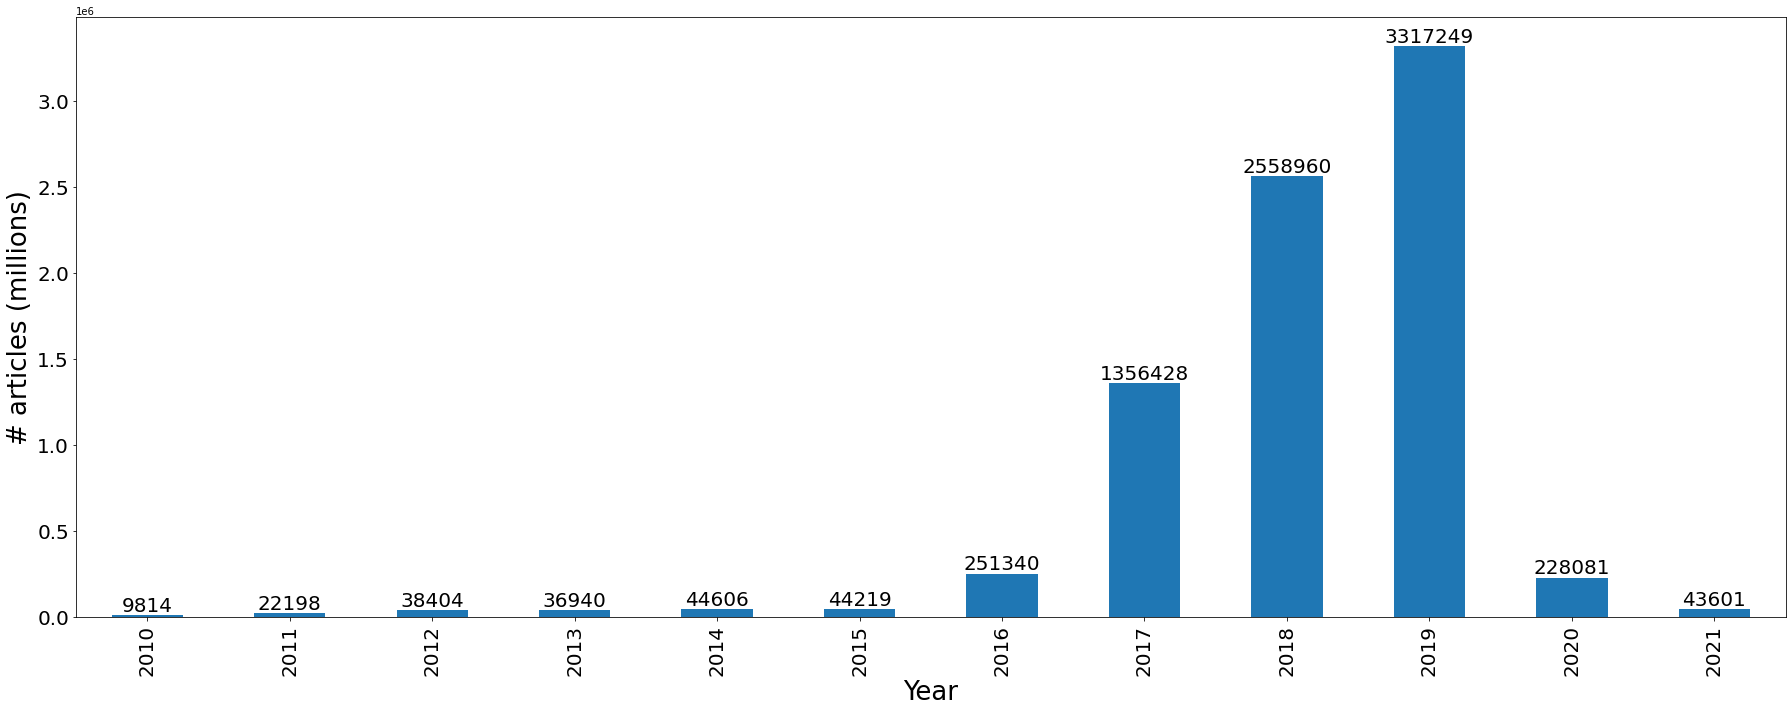

In [24]:
plt.rcParams["figure.figsize"] = (25,10)
ax = cc_df.groupby('year')['source_name'].count().plot(kind='bar', stacked=True)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('# articles (millions)', fontsize = 26)
plt.xlabel('Year', fontsize = 26)                                                                                                                                                                                                                                                                                                      

rects = ax.patches

# Make some labels.
labels = ["label%d" % i for i in range(len(rects))]

for rect in rects:
    height = rect.get_height()
    label_text = f'{int(height)}'
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label_text,
            ha='center', va='bottom', fontsize=20)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
plt.tight_layout()
plt.savefig('/home/morini/mydata/ebu_project/EU_eurotopics_data/media_year.png')
plt.show()

In [25]:
cc_df['political_leaning'] = cc_df['political_leaning'].replace('Far left', 'Left-wing')
cc_df['political_leaning'] = cc_df['political_leaning'].replace('Liberal-conservative', 'Centre-right')

<ipython-input-25-9ad2629f12d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df['political_leaning'] = cc_df['political_leaning'].replace('Far left', 'Left-wing')
<ipython-input-25-9ad2629f12d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df['political_leaning'] = cc_df['political_leaning'].replace('Liberal-conservative', 'Centre-right')


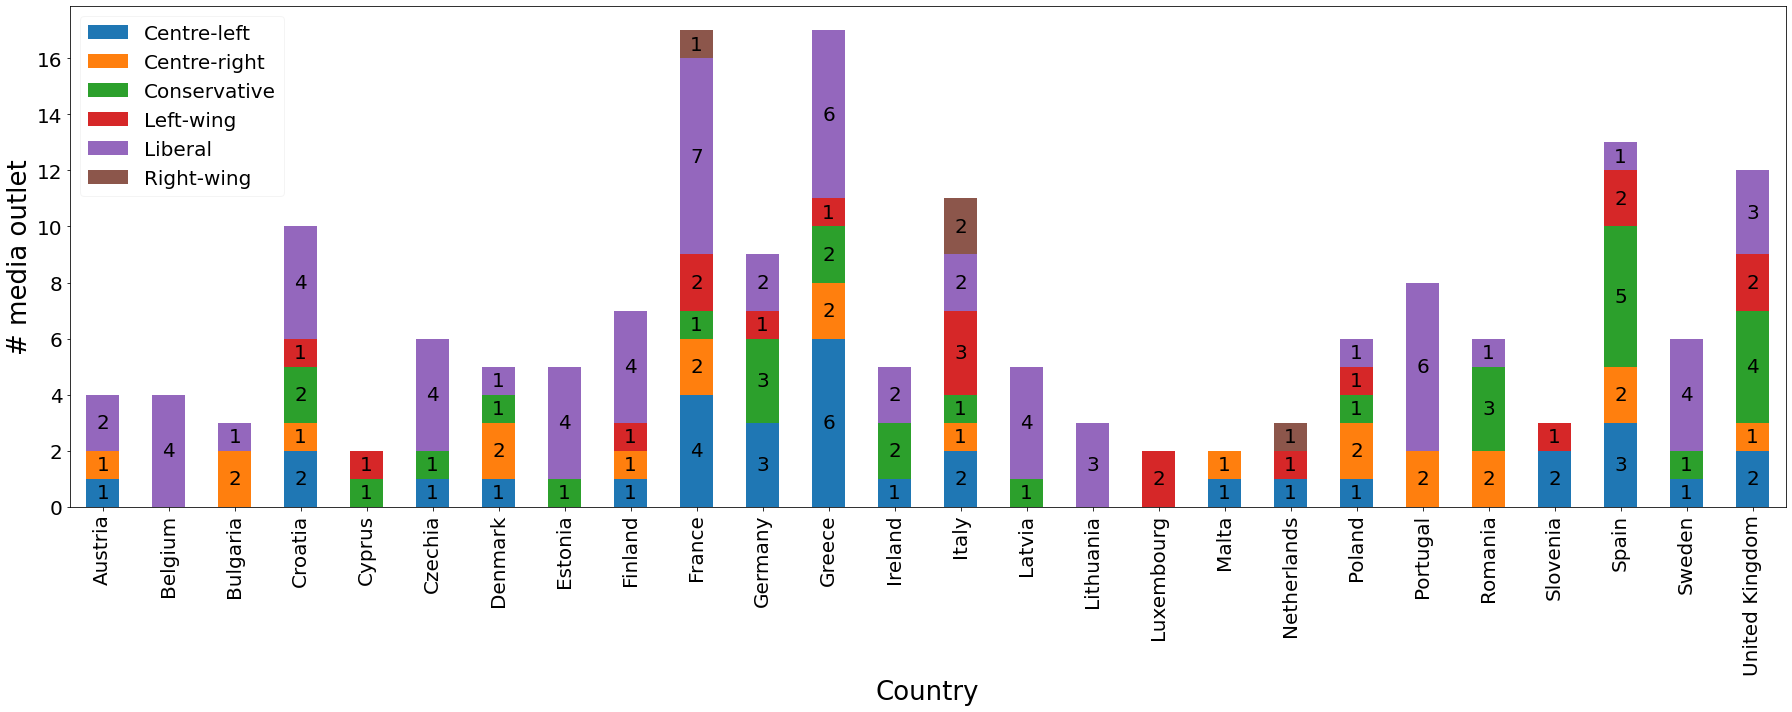

In [29]:
plt.rcParams["figure.figsize"] = (25,10)
ax = cc_df.groupby(['country','political_leaning'])['source_name'].nunique().unstack().plot(kind='bar', stacked=True)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('# media outlet', fontsize = 26)
plt.xlabel('Country', fontsize = 26)
plt.legend(prop={'size': 20}, framealpha=0.2, loc='upper left')

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{int(height)}'  # f'{height:.2f}' to format decimal values

    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=20, color='black')
plt.tight_layout()
plt.savefig('/home/morini/mydata/ebu_project/EU_eurotopics_data/media_outlet_country.png')
plt.show()

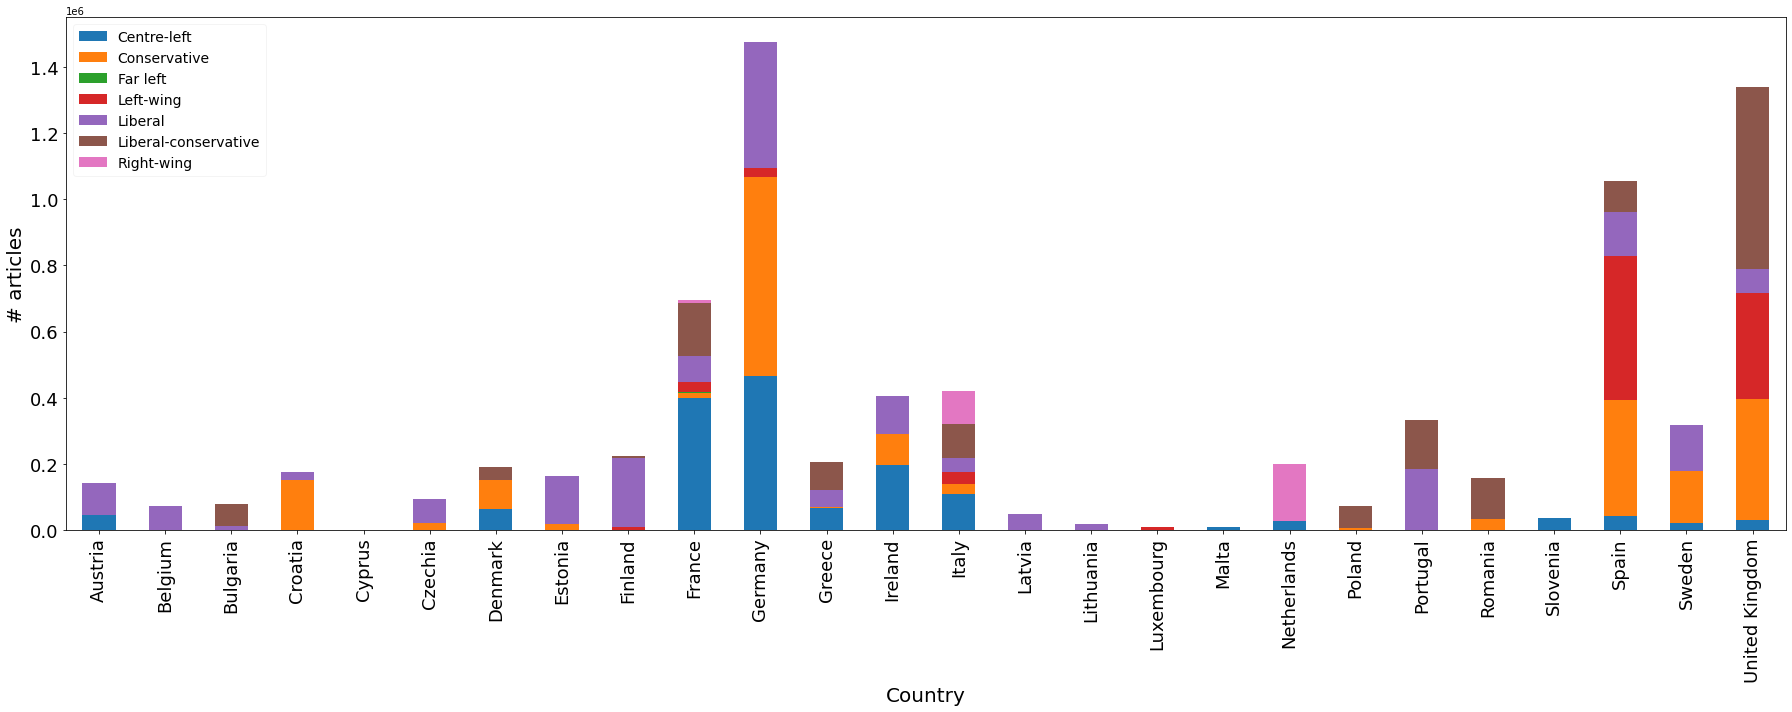

In [20]:
plt.rcParams["figure.figsize"] = (25,10)
ax = cc_df.groupby(['country','political_leaning'])['source_name'].count().unstack().plot(kind='bar', stacked=True)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('# articles', fontsize = 20)
plt.xlabel('Country', fontsize = 20)
plt.legend(prop={'size': 14}, framealpha=0.2, loc='upper left')

plt.tight_layout()
#plt.savefig('/home/morini/mydata/ebu_project/eurotopics_data/articles_country_newattempt.png')
plt.show()

## Text Cleaning

In [2]:
import re
import string

In [5]:
df = pd.read_csv('/home/morini/mydata/ebu_project/EU_eurotopics_data/commoncrawl_allmedia/eu_df_filtered.csv')
df.head()

,title,maintext,date_publish,language,source_domain,id,country,source_name,political_leaning,year
0,Vonn meldet sich in Lake Louise per Skype-Anru...,"""Positive Erklärung""\nIn dieser möchte Vonn no...",2018-11-29 17:23:30,de,kurier.at,b3f9eabee4a065e5e46e486a8af905283ae7c0362d0cb3...,Austria,Kurier,Liberal,2018.0
1,Baustelle Pilgramgasse: Die Neuordnung des Wie...,"""Solche Arbeiten versuchen wir natürlich unter...",2019-02-15 04:00:00,de,kurier.at,aa41faf73c778b536e4f2593a37d7c25eaaf39c2878868...,Austria,Kurier,Liberal,2019.0
2,Nachrichten-Überblick: Die wichtigsten Themen ...,Guten Morgen...\n... aus dem KURIER-Newsroom. ...,2019-05-23 05:26:10,de,kurier.at,ac84b6032c2381adbab9963443f280cc62226ba9804ee8...,Austria,Kurier,Liberal,2019.0
3,"Nach langer Krankheit: ""Wembley-Tor""-Goalie ve...",Obwohl der Ball wohl nicht in vollem Umfang di...,2020-01-06 12:51:50,de,kurier.at,7b60b40b5d88956ffa5c3f3c52727806bff4d9fb9cbc5d...,Austria,Kurier,Liberal,2020.0
4,Der Fernsehwahlkampf der Emotionen ist vorbei,Die letzten Video-Lücken sind abgedichtet: Kle...,2019-09-27 14:55:55,de,kurier.at,2f209f932ecb28e8919125312577376e9b3a1458b19c92...,Austria,Kurier,Liberal,2019.0


In [6]:
def clean_text(df):

    regex_pat = re.compile(r'\n', flags=re.IGNORECASE)
    print('done')
    df['maintext'] = df['maintext'].str.replace(regex_pat, " ")  # remove '\n' charac
    print('done')
    regex_pat2 = re.compile(r'[(http(s)?):\/\/(www\.)?a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)', flags=re.IGNORECASE) # remove http and www URL
    print('done')
    df['maintext'] = df['maintext'].str.replace(regex_pat2, " ")
    print('done')
    regex_pat3 = re.compile(r'\S*@[A-Za-z0-9_]*[.!?\\-]*[A-Za-z0-9_]*\S', flags=re.IGNORECASE) #remove mentions
    print('done')
    df['maintext'] = df['maintext'].str.replace(regex_pat3, " ")
    print('done')
    regex_pat4 = re.compile(r'#[A-Za-z0-9_]+', flags=re.IGNORECASE) # remove hastags
    print('done')
    df['maintext'] = df['maintext'].str.replace(regex_pat4, " ")
    print('done')
    regex_pat5 = re.compile(r'\([am][^ ]*| \(dpa[^ ]+ |\(dpa/es\)', flags=re.IGNORECASE) #remove 'dpa' or 'apa' characters
    print('done')
    df['maintext'] = df['maintext'].str.replace(regex_pat5, " ")
    print('done')
    regex_pat6 = re.compile(r'(?:(?:31(\/|-|\.)(?:0?[13578]|1[02]))\1|(?:(?:29|30)(\/|-|\.)(?:0?[13-9]|1[0-2])\2))(?:(?:1[6-9]|[2-9]\d)?\d{2})$|^(?:29(\/|-|\.)0?2\3(?:(?:(?:1[6-9]|[2-9]\d)?(?:0[48]|[2468][048]|[13579][26])|(?:(?:16|[2468][048]|[3579][26])00))))$|^(?:0?[1-9]|1\d|2[0-8])(\/|-|\.)(?:(?:0?[1-9])|(?:1[0-2]))\4(?:(?:1[6-9]|[2-9]\d)?\d{2})', flags=re.IGNORECASE) # remove date
    print('done')
    df['maintext'] = df['maintext'].str.replace(regex_pat6, " ")
    print('done')
    regex_pat7 = re.compile(r'\b(0[0-9]|1[0-9]|2[0-3]):[0-5][0-9]\b', flags=re.IGNORECASE) #remove timestamp
    print('done')
    df['maintext'] = df['maintext'].str.replace(regex_pat7, " ")
    print('done')
    regex_pat8 = re.compile(r'\S+\/(\w+)\/\S+', flags=re.IGNORECASE) #remove '/tag/'
    df['maintext'] = df['maintext'].str.replace(regex_pat8, " ")
    regex_pat9 = re.compile(r'[^.]*(FOTO|IMAGE|VIDEO)[^.]*') #remove references to foto, video, images
    print('done')
    df['maintext'] = df['maintext'].str.replace(regex_pat9, " ")
    df['maintext'] = df['maintext'].str.replace('mehr dazu hier'," ")
    df['maintext'] = df['maintext'].str.replace('Ziare. com', " ")
    print('done')
    regex_pat10 = re.compile(r'<(.+?)>') #remove '<tag>'
    df['maintext'] = df['maintext'].str.replace(regex_pat10, " ")
    print('done')
    df['maintext'] = df['maintext'].str.replace('Get the biggest daily news stories by email Subscribe Thank you for subscribing We have more newsletters Show me See our privacy notice Could not subscribe, try again later Invalid Email', " ")
    regex_pat11 = re.compile(r'\[\.\.\.\]', flags=re.IGNORECASE) # remove '[...]'
    df['maintext'] = df['maintext'].str.replace(regex_pat11, " ")
    print('done')
    regex_pat12 = re.compile(r'\.\.\.$', flags=re.IGNORECASE) # remove '...' at the end of the article
    df['maintext'] = df['maintext'].str.replace(regex_pat12, " ")
    print('done')
    media = set(df['source_name'].to_list())
    media = list(media)
    print('done')
    df['maintext'] = df['maintext'].str.replace('|'.join(media),' ') # remove all media names
    

    return df

filtered_df = clean_text(df)

KeyboardInterrupt: 

In [ ]:
filtered_df.to_csv('/home/morini/mydata/ebu_project/EU_eurotopics_data/commoncrawl_allmedia/eu_df_cleaned_punt.csv', index=False)

In [ ]:
filtered_df = pd.read_csv('/home/morini/mydata/ebu_project/EU_eurotopics_data/commoncrawl_allmedia/eu_df_cleaned_punt.csv')

In [ ]:
england_df = filtered_df.loc[filtered_df.country == 'United Kingdom']
england_df

In [ ]:
# ENGLAND Cleaning

england_df['maintext'] = england_df['maintext'].str.replace('We are sorry, you need to be a subscriber to watch this video We are sorry, you need to be a subscriber to watch this video', " ")
england_df['maintext'] = england_df['maintext'].str.replace('Subscribe to FT Life on YouTube for the latest FT Weekend videos', " ")
england_df['maintext'] = england_df['maintext'].str.replace('Subscribe to Kernels on iTunes and podcasts apps here and follow the podcast host and culture reporter on Twitter. You can find episode 1 with Matthew McConaughey here.', " ")
england_df['maintext'] = england_df['maintext'].str.replace('Here’s the best of this week’s opinion and analysis', " ")
england_df['maintext'] = england_df['maintext'].str.replace('You can WhatsApp us on 07810 791 502. We pay for videos too. Click here to upload yours.', " ")
england_df = england_df.loc[england_df.title!='Subscribe to read']
regex_pat9 = re.compile(r'[^.]*(g|G)etty[^.]*')
england_df['maintext'] = england_df['maintext'].str.replace(regex_pat9, " ")
regex_pat10 = re.compile(r'Subscribe (to|at|below|here|in)[^.]*')
england_df['maintext'] = england_df['maintext'].str.replace(regex_pat10, " ")
england_df

In [ ]:
test = england_df[england_df.maintext.str.contains('Here’s the best of this week’s opinion and analysis')]
#test.to_csv('/home/morini/mydata/ebu_project/eurotopics_data/commoncrawl_allmedia/test.csv', index=False)
test


### Dataset without punctuation

In [ ]:
filtered_df['maintext'] = filtered_df['maintext'].str.replace('[{}]'.format(string.punctuation), '')
filtered_df['maintext'] = filtered_df['title'].str.replace('[{}]'.format(string.punctuation), '')
filtered_df.head()

In [ ]:
filtered_df = filtered_df.loc[filtered_df.source_name != 'Tportal']
filtered_df.to_csv('/home/morini/mydata/ebu_project/EU_eurotopics_data/commoncrawl_allmedia/eu_df_cleaned_punt.csv')

In [ ]:
# TODO: REMOVE (to look for media outlets)
media = set(england_df['source_name'].to_list())
media = list(media)
i = 11
test = england_df.loc[england_df.source_name == media[i]]
test.head()

In [ ]:
# merge far left and left wing in an unique field
df['political_leaning'] = df['political_leaning'].replace('Far left', 'Left-wing')
df.political_leaning.value_counts()

## Create training/test set for multilingual classification

In [24]:
# all eu df cleaned dataset WITHOUT punctuation (6 class)
df = pd.read_csv('/home/morini/mydata/ebu_project/EU_eurotopics_data/commoncrawl_allmedia/eu_df_cleaned_nopunt.csv')
df.head()

,title,maintext,date_publish,language,source_domain,id,country,source_name,political_leaning,year
0,Vonn meldet sich in Lake Louise per SkypeAnruf...,Positive Erklärung In dieser möchte Vonn noch ...,2018-11-29 17:23:30,de,kurier.at,b3f9eabee4a065e5e46e486a8af905283ae7c0362d0cb3...,Austria,Kurier,Liberal,2018.0
1,Baustelle Pilgramgasse Die Neuordnung des Wien...,che Arbeiten versuchen wir natürlich untertag...,2019-02-15 04:00:00,de,kurier.at,aa41faf73c778b536e4f2593a37d7c25eaaf39c2878868...,Austria,Kurier,Liberal,2019.0
2,NachrichtenÜberblick Die wichtigsten Themen de...,Guten Morgen aus dem KURIERNewsroom Wir melde...,2019-05-23 05:26:10,de,kurier.at,ac84b6032c2381adbab9963443f280cc62226ba9804ee8...,Austria,Kurier,Liberal,2019.0
3,Nach langer Krankheit WembleyTorGoalie verstorben,Obwohl der Ball wohl nicht in vollem Umfang di...,2020-01-06 12:51:50,de,kurier.at,7b60b40b5d88956ffa5c3f3c52727806bff4d9fb9cbc5d...,Austria,Kurier,Liberal,2020.0
4,Der Fernsehwahlkampf der Emotionen ist vorbei,Die letzten VideoLücken sind abgedichtet Klein...,2019-09-27 14:55:55,de,kurier.at,2f209f932ecb28e8919125312577376e9b3a1458b19c92...,Austria,Kurier,Liberal,2019.0


In [25]:
df.political_leaning.value_counts()

Conservative            1941421
Liberal                 1898538
Centre-left             1524292
Liberal-conservative    1438228
Left-wing                862904
Right-wing               284743
Name: political_leaning, dtype: int64

In [2]:
# all eu df cleaned dataset WITH punctuation (6 class)
df = pd.read_csv('/home/morini/mydata/ebu_project/EU_eurotopics_data/commoncrawl_allmedia/eu_df_cleaned_punt.csv')
df.head() # TODO: questo file non riesco più aprirlo prova a recuperarlo di nuovo oppure fai solo il test con il file senza punteggiatura

,title,maintext,date_publish,language,source_domain,id,country,source_name,political_leaning,year
0,Vonn meldet sich in Lake Louise per Skype-Anru...,"""Positive Erklärung"" In dieser möchte Vonn noc...",2018-11-29 17:23:30,de,kurier.at,b3f9eabee4a065e5e46e486a8af905283ae7c0362d0cb3...,Austria,Kurier,Liberal,2018.0
1,Baustelle Pilgramgasse: Die Neuordnung des Wie...,""" che Arbeiten versuchen wir natürlich unterta...",2019-02-15 04:00:00,de,kurier.at,aa41faf73c778b536e4f2593a37d7c25eaaf39c2878868...,Austria,Kurier,Liberal,2019.0
2,Nachrichten-Überblick: Die wichtigsten Themen ...,Guten Morgen... ... aus dem KURIER-Newsroom. W...,2019-05-23 05:26:10,de,kurier.at,ac84b6032c2381adbab9963443f280cc62226ba9804ee8...,Austria,Kurier,Liberal,2019.0
3,"Nach langer Krankheit: ""Wembley-Tor""-Goalie ve...",Obwohl der Ball wohl nicht in vollem Umfang di...,2020-01-06 12:51:50,de,kurier.at,7b60b40b5d88956ffa5c3f3c52727806bff4d9fb9cbc5d...,Austria,Kurier,Liberal,2020.0
4,Der Fernsehwahlkampf der Emotionen ist vorbei,Die letzten Video-Lücken sind abgedichtet: Kle...,2019-09-27 14:55:55,de,kurier.at,2f209f932ecb28e8919125312577376e9b3a1458b19c92...,Austria,Kurier,Liberal,2019.0


In [6]:
# merge far left and left wing in an unique field
df['political_leaning'] = df['political_leaning'].replace('Far left', 'Left-wing')
df.political_leaning.value_counts()

Conservative            1941421
Liberal                 1900252
Centre-left             1524292
Liberal-conservative    1438228
Left-wing                862904
Right-wing               284743
Name: political_leaning, dtype: int64

## training set

In [5]:
# select the training set (200k for each label)

df1 = df.loc[df.political_leaning == 'Conservative'].sample(200000)
df2 = df.loc[df.political_leaning == 'Liberal'].sample(200000)
df3 = df.loc[df.political_leaning == 'Centre-left'].sample(200000)
df4 = df.loc[df.political_leaning == 'Liberal-conservative'].sample(200000)
df5 = df.loc[df.political_leaning == 'Left-wing'].sample(200000)
df6 = df.loc[df.political_leaning == 'Right-wing'].sample(200000)

In [ ]:
# creating the training set 

training  = pd.concat([df1, df2, df3, df4, df5, df6])
training.head()

In [13]:
training.political_leaning.value_counts()

Right-wing              200000
Left-wing               200000
Centre-left             200000
Liberal-conservative    200000
Conservative            200000
Liberal                 200000
Name: political_leaning, dtype: int64

In [14]:
# saving the training set without punctuation
training.to_csv('/home/morini/mydata/ebu_project/EU_eurotopics_data/commoncrawl_allmedia/training_maintext_nopunt.csv')

In [4]:
# reading the training set with  punctuation
training = pd.read_csv('/home/morini/mydata/ebu_project/EU_eurotopics_data/commoncrawl_allmedia/training_maintext_punt.csv')
print(len(training)) #1200000 records

1200000


In [26]:
test = pd.read_csv('/home/morini/mydata/ebu_project/EU_eurotopics_data/commoncrawl_allmedia/test_maintext_punt.csv')
test

,title,maintext,date_publish,language,source_domain,id,country,source_name,political_leaning,year
0,Lage in den Bergen spitzt sich zu,Auch weiter östlich bleibt die Lage kritisch. ...,2019-01-07 17:37:05,de,kurier.at,91ad544c3067b412a6e4e111513e9632c507b44c25e827...,Austria,Kurier,Liberal,2019.0
1,Mindestsicherung: Diakonie kritisiert Wohnsitz...,Nachdem eine bundeseinheitliche Lösung geschei...,2017-02-23 18:00:00,de,kurier.at,112914d9eb5482d37354b178a6820ce6b292a01178a690...,Austria,Kurier,Liberal,2017.0
2,"Schwierige Scheidung bei ""Grey's Anatomy""-Star...",""" Grey's Anatomy""-Star Jesse Williams steckt m...",2019-05-20 12:28:36,de,kurier.at,a3a9feb8111b1ed49eb6cc65140245012d137ecf8db63f...,Austria,Kurier,Liberal,2019.0
3,Mexiko will schnelle Zusammenführung von Migra...,Im Konflikt um die Trennung von lateinamerikan...,2018-07-14 06:35:44,de,kurier.at,63832af05a2eef032c89c2cce2af6ff5e452a6d34e2bc0...,Austria,Kurier,Liberal,2018.0
4,Nach Geiselnahme in Köln: Polizei durchsuchte ...,Eine Geiselnahme im Kölner Hauptbahnhof hat di...,2018-10-16 09:12:08,de,kurier.at,17e8a8ee8e1ad6ffcfefe2ce6dc6bbfdf710eaeecc8c39...,Austria,Kurier,Liberal,2018.0
...,...,...,...,...,...,...,...,...,...,...
299995,χέρι με το κίνημα κατά των αμβλώσεων ο Τραμπ,Ο Ντόναλντ Τραμπ θα γίνει ο τρίτος εν ενεργεία...,2018-03-25 00:00:00,el,tvxs.gr,ad826141b0fa2445404795c8439a4a44f73eabede0d7e1...,Greece,TVXS,Centre-left,2018.0
299996,You Know I Love You... B.B. King,Υπήρξε ένας θρύλος της μπλουζ μουσικής. Ο B.B....,2018-05-14 07:29:51,el,tvxs.gr,9679ba7c89492106b75b38eccd117caf0b914b99345dc8...,Greece,TVXS,Centre-left,2018.0
299997,ΒΙΝΤΕΟ: Έσκαψαν με γυμνά χέρια για να σώσουν κ...,Την δραματική διάσωση ενός 9χρονου κοριτσιού π...,2018-07-25 00:00:00,el,tvxs.gr,18f76f55e4d87c37c3de47a91e2f6640df6b249f98365e...,Greece,TVXS,Centre-left,2018.0
299998,Ο Μπουφόν αποθεώνει Λαρεντζάκη!,Ο Τζιανλουίτζι Μπουφόν αποθέωσε τον Γιαννούλη ...,2018-03-29 22:47:45,el,tvxs.gr,591f30c56e2def3bb477a78ad7da54b4d1124111eec392...,Greece,TVXS,Centre-left,2018.0


In [27]:
test.political_leaning.value_counts()

Conservative            50000
Liberal-conservative    50000
Centre-left             50000
Liberal                 50000
Left-wing               50000
Right-wing              50000
Name: political_leaning, dtype: int64

In [28]:
test.country.value_counts()

United Kingdom    49615
Germany           42420
Spain             42373
Netherlands       31187
Italy             29132
France            24952
Ireland           11737
Portugal          10120
Sweden             8268
Greece             6650
Finland            6257
Denmark            5759
Romania            5213
Croatia            4514
Estonia            4206
Austria            4153
Bulgaria           2638
Poland             2441
Czechia            2395
Belgium            2052
Latvia             1317
Slovenia           1188
Luxembourg          544
Lithuania           522
Malta               321
Cyprus               26
Name: country, dtype: int64

In [29]:
# create the same test set for dataset with punct and without punct
test_ids = test.id.to_list()
test_punt = df.loc[df.id.isin(test_ids)] # the ids must be the same
test_punt.head()

,title,maintext,date_publish,language,source_domain,id,country,source_name,political_leaning,year
124,Lage in den Bergen spitzt sich zu,Auch weiter östlich bleibt die Lage kritisch M...,2019-01-07 17:37:05,de,kurier.at,91ad544c3067b412a6e4e111513e9632c507b44c25e827...,Austria,Kurier,Liberal,2019.0
171,Mindestsicherung Diakonie kritisiert Wohnsitzp...,Nachdem eine bundeseinheitliche Lösung geschei...,2017-02-23 18:00:00,de,kurier.at,112914d9eb5482d37354b178a6820ce6b292a01178a690...,Austria,Kurier,Liberal,2017.0
174,Schwierige Scheidung bei Greys AnatomyStar Jes...,Greys AnatomyStar Jesse Williams steckt mitte...,2019-05-20 12:28:36,de,kurier.at,a3a9feb8111b1ed49eb6cc65140245012d137ecf8db63f...,Austria,Kurier,Liberal,2019.0
221,Mexiko will schnelle Zusammenführung von Migra...,Im Konflikt um die Trennung von lateinamerikan...,2018-07-14 06:35:44,de,kurier.at,63832af05a2eef032c89c2cce2af6ff5e452a6d34e2bc0...,Austria,Kurier,Liberal,2018.0
224,Nach Geiselnahme in Köln Polizei durchsuchte W...,Eine Geiselnahme im Kölner Hauptbahnhof hat di...,2018-10-16 09:12:08,de,kurier.at,17e8a8ee8e1ad6ffcfefe2ce6dc6bbfdf710eaeecc8c39...,Austria,Kurier,Liberal,2018.0


In [30]:
test_punt.political_leaning.value_counts()

Conservative            50000
Liberal-conservative    50000
Centre-left             50000
Liberal                 50000
Left-wing               50000
Right-wing              50000
Name: political_leaning, dtype: int64

In [31]:
test_punt.country.value_counts()

United Kingdom    49615
Germany           42420
Spain             42373
Netherlands       31187
Italy             29132
France            24952
Ireland           11737
Portugal          10120
Sweden             8268
Greece             6650
Finland            6257
Denmark            5759
Romania            5213
Croatia            4514
Estonia            4206
Austria            4153
Bulgaria           2638
Poland             2441
Czechia            2395
Belgium            2052
Latvia             1317
Slovenia           1188
Luxembourg          544
Lithuania           522
Malta               321
Cyprus               26
Name: country, dtype: int64

In [32]:
test_punt.to_csv('/home/morini/mydata/ebu_project/EU_eurotopics_data/commoncrawl_allmedia/test_maintext_nopunt.csv', index=False)

## test set

In [8]:
# removing data chosen for training set from the all dataset and creating thus the test set
df = df.drop(training['Unnamed: 0.1'])
print(len(df))

6750126


In [9]:
# select 50k data for the test set

df1 = df.loc[df.political_leaning == 'Conservative'].sample(50000)
df2 = df.loc[df.political_leaning == 'Liberal'].sample(50000)
df3 = df.loc[df.political_leaning == 'Centre-left'].sample(50000)
df4 = df.loc[df.political_leaning == 'Liberal-conservative'].sample(50000)
df5 = df.loc[df.political_leaning == 'Left-wing'].sample(50000)
df6 = df.loc[df.political_leaning == 'Right-wing'].sample(50000)

test  = pd.concat([df1, df2, df3, df4, df5, df6])

In [40]:
# add labels to the test set
labels = {'Liberal': 1, 'Conservative': 0, 'Centre-left': 2, 'Left-wing': 4, 'Liberal-conservative': 3, 'Right-wing': 5}
test['label'] = test['political_leaning'].map(labels)
test.political_leaning.value_counts()

Conservative            50000
Liberal-conservative    50000
Centre-left             50000
Liberal                 50000
Left-wing               50000
Right-wing              50000
Name: political_leaning, dtype: int64

In [41]:
# saving the test set without punctuation
test.to_csv('/home/morini/mydata/ebu_project/EU_eurotopics_data/commoncrawl_allmedia/test_maintext_nopunt.csv', index=False)

In [42]:
test_punt = pd.read_csv('/home/morini/mydata/ebu_project/EU_eurotopics_data/commoncrawl_allmedia/test_maintext_punt.csv')
test_punt

,title,maintext,date_publish,language,source_domain,id,country,source_name,political_leaning,year,label
0,Lage in den Bergen spitzt sich zu,Auch weiter östlich bleibt die Lage kritisch. ...,2019-01-07 17:37:05,de,kurier.at,91ad544c3067b412a6e4e111513e9632c507b44c25e827...,Austria,Kurier,Liberal,2019.0,1
1,Mindestsicherung: Diakonie kritisiert Wohnsitz...,Nachdem eine bundeseinheitliche Lösung geschei...,2017-02-23 18:00:00,de,kurier.at,112914d9eb5482d37354b178a6820ce6b292a01178a690...,Austria,Kurier,Liberal,2017.0,1
2,"Schwierige Scheidung bei ""Grey's Anatomy""-Star...",""" Grey's Anatomy""-Star Jesse Williams steckt m...",2019-05-20 12:28:36,de,kurier.at,a3a9feb8111b1ed49eb6cc65140245012d137ecf8db63f...,Austria,Kurier,Liberal,2019.0,1
3,Mexiko will schnelle Zusammenführung von Migra...,Im Konflikt um die Trennung von lateinamerikan...,2018-07-14 06:35:44,de,kurier.at,63832af05a2eef032c89c2cce2af6ff5e452a6d34e2bc0...,Austria,Kurier,Liberal,2018.0,1
4,Nach Geiselnahme in Köln: Polizei durchsuchte ...,Eine Geiselnahme im Kölner Hauptbahnhof hat di...,2018-10-16 09:12:08,de,kurier.at,17e8a8ee8e1ad6ffcfefe2ce6dc6bbfdf710eaeecc8c39...,Austria,Kurier,Liberal,2018.0,1
...,...,...,...,...,...,...,...,...,...,...,...
299995,χέρι με το κίνημα κατά των αμβλώσεων ο Τραμπ,Ο Ντόναλντ Τραμπ θα γίνει ο τρίτος εν ενεργεία...,2018-03-25 00:00:00,el,tvxs.gr,ad826141b0fa2445404795c8439a4a44f73eabede0d7e1...,Greece,TVXS,Centre-left,2018.0,2
299996,You Know I Love You... B.B. King,Υπήρξε ένας θρύλος της μπλουζ μουσικής. Ο B.B....,2018-05-14 07:29:51,el,tvxs.gr,9679ba7c89492106b75b38eccd117caf0b914b99345dc8...,Greece,TVXS,Centre-left,2018.0,2
299997,ΒΙΝΤΕΟ: Έσκαψαν με γυμνά χέρια για να σώσουν κ...,Την δραματική διάσωση ενός 9χρονου κοριτσιού π...,2018-07-25 00:00:00,el,tvxs.gr,18f76f55e4d87c37c3de47a91e2f6640df6b249f98365e...,Greece,TVXS,Centre-left,2018.0,2
299998,Ο Μπουφόν αποθεώνει Λαρεντζάκη!,Ο Τζιανλουίτζι Μπουφόν αποθέωσε τον Γιαννούλη ...,2018-03-29 22:47:45,el,tvxs.gr,591f30c56e2def3bb477a78ad7da54b4d1124111eec392...,Greece,TVXS,Centre-left,2018.0,2


In [43]:
test_nopunt = pd.read_csv('/home/morini/mydata/ebu_project/EU_eurotopics_data/commoncrawl_allmedia/test_maintext_nopunt.csv')
test_nopunt

,title,maintext,date_publish,language,source_domain,id,country,source_name,political_leaning,year,label
0,Lage in den Bergen spitzt sich zu,Auch weiter östlich bleibt die Lage kritisch M...,2019-01-07 17:37:05,de,kurier.at,91ad544c3067b412a6e4e111513e9632c507b44c25e827...,Austria,Kurier,Liberal,2019.0,1
1,Mindestsicherung Diakonie kritisiert Wohnsitzp...,Nachdem eine bundeseinheitliche Lösung geschei...,2017-02-23 18:00:00,de,kurier.at,112914d9eb5482d37354b178a6820ce6b292a01178a690...,Austria,Kurier,Liberal,2017.0,1
2,Schwierige Scheidung bei Greys AnatomyStar Jes...,Greys AnatomyStar Jesse Williams steckt mitte...,2019-05-20 12:28:36,de,kurier.at,a3a9feb8111b1ed49eb6cc65140245012d137ecf8db63f...,Austria,Kurier,Liberal,2019.0,1
3,Mexiko will schnelle Zusammenführung von Migra...,Im Konflikt um die Trennung von lateinamerikan...,2018-07-14 06:35:44,de,kurier.at,63832af05a2eef032c89c2cce2af6ff5e452a6d34e2bc0...,Austria,Kurier,Liberal,2018.0,1
4,Nach Geiselnahme in Köln Polizei durchsuchte W...,Eine Geiselnahme im Kölner Hauptbahnhof hat di...,2018-10-16 09:12:08,de,kurier.at,17e8a8ee8e1ad6ffcfefe2ce6dc6bbfdf710eaeecc8c39...,Austria,Kurier,Liberal,2018.0,1
...,...,...,...,...,...,...,...,...,...,...,...
299995,χέρι με το κίνημα κατά των αμβλώσεων ο Τραμπ,Ο Ντόναλντ Τραμπ θα γίνει ο τρίτος εν ενεργεία...,2018-03-25 00:00:00,el,tvxs.gr,ad826141b0fa2445404795c8439a4a44f73eabede0d7e1...,Greece,TVXS,Centre-left,2018.0,2
299996,You Know I Love You BB King,Υπήρξε ένας θρύλος της μπλουζ μουσικής Ο BB Ki...,2018-05-14 07:29:51,el,tvxs.gr,9679ba7c89492106b75b38eccd117caf0b914b99345dc8...,Greece,TVXS,Centre-left,2018.0,2
299997,ΒΙΝΤΕΟ Έσκαψαν με γυμνά χέρια για να σώσουν κο...,Την δραματική διάσωση ενός 9χρονου κοριτσιού π...,2018-07-25 00:00:00,el,tvxs.gr,18f76f55e4d87c37c3de47a91e2f6640df6b249f98365e...,Greece,TVXS,Centre-left,2018.0,2
299998,Ο Μπουφόν αποθεώνει Λαρεντζάκη,Ο Τζιανλουίτζι Μπουφόν αποθέωσε τον Γιαννούλη ...,2018-03-29 22:47:45,el,tvxs.gr,591f30c56e2def3bb477a78ad7da54b4d1124111eec392...,Greece,TVXS,Centre-left,2018.0,2


## Building media-based test set 
(i.e., test set with media sources not seen during training)

In [51]:
# new mapping obtained through scraping.py
mapping = pd.read_csv('mapping_df.csv')
mapping.head()

,Unnamed: 0,title,leaning,url
0,0,Al-Ahram,Pro-government,gate.ahram.org.eg
1,1,Daily News Egypt,NaN,dailynewsegypt.com
2,2,El Watan,nationalistisch,www.elwatannews.com
3,3,Shorouk,Islamic,www.shorouknews.com
4,4,Le Quotidien d'Oran,Pro-government,www.lequotidien-oran.com


In [52]:
mapping.leaning.value_counts()

Liberal                       190
Centre-left                    93
Conservative                   80
Liberal-conservative           68
Left-wing                      55
Pro-government                 43
Critical of the government     30
Right-wing                     14
nationalistisch                11
Catholic                       10
Christian                       8
separatistisch                  3
Kemalist                        3
Islamic                         2
secular                         1
pro-Kurdish                     1
Name: leaning, dtype: int64

In [53]:
# cleaning mapping: dropping nan and selecting only labels used for training
mapping.dropna(inplace=True)
mapping = mapping.loc[mapping.leaning.isin(['Liberal','Conservative','Centre-left','Left-wing','Liberal-conservative','Right-wing'])]
mapping.head()

,Unnamed: 0,title,leaning,url
6,6,Página/12,Centre-left,www.pagina12.com.ar
11,11,Blog Coulisses de Bruxelles,Centre-left,bruxelles.blogs.liberation.fr
12,12,De Morgen,Left-wing,www.demorgen.be
13,13,De Standaard,Liberal-conservative,www.standaard.be
14,14,De Tijd,Liberal,www.tijd.be


In [54]:
# filtered mapping 
mapping = pd.read_csv('mapping_filtered.csv')

In [55]:
# defining dict source_domain:leaning
import json
media_label = dict()
for index, row in mapping.iterrows():
        if not pd.isnull(row['leaning']):
            media_label[row['url']] = row['leaning']
print(len(media_label))
with open('url2leaning.json', 'w') as fp:
    json.dump(media_label, fp)

with open('url2leaning.json') as json_file:
    url2leaning = json.load(json_file)

491


In [56]:
# defining dict source_domain:source_name
import json
media_names = dict()
for index, row in mapping.iterrows():
        if not pd.isnull(row['leaning']):
            media_names[row['url']] = row['title']
print(len(media_names))
with open('url2name.json', 'w') as fp:
    json.dump(media_names, fp)

with open('url2name.json') as json_file:
    url2name = json.load(json_file)

491


In [57]:
# test no bias lorenzo + mapping 
test_no_bias = pd.read_csv('test_media_split.csv')
test_no_bias.dropna(inplace=True)
test_no_bias.head()

,Unnamed: 0,title,maintext,date_publish,language,source_domain,id,source_name,political_leaning
0,1210631,"Weitere ""Stimmungsaufheller"" für die US-Konjun...",Nach dem Sieg von Donald Trump bei den US-Wahl...,2016-12-23 16:33:00,de,www.diepresse.com,51b098f81ad67483a8bf52802f2a11b228d7335bbdab6c...,Die Presse,Liberal-conservative
1,1210632,Mercedes verkauft im Jänner deutlich weniger N...,Die Marke mit dem Stern lieferte im vergangene...,2019-02-11 11:04:00,de,www.diepresse.com,4d53ef8c07ac400d7baa1644544420a9239e67de9ed47f...,Die Presse,Liberal-conservative
2,1210633,Ein Kurzflug in die Flugzukunft,In diesen Tagen fliegen Millionen Menschen in ...,2018-07-16 09:06:00,de,www.diepresse.com,350631a0724e3ee2cc277bee241496a3ad6494e2bf6d33...,Die Presse,Liberal-conservative
3,1210634,Frankreich: Charles der Große,Dass der Gaullist François Fillon sich auf Cha...,2017-05-05 12:42:00,de,www.diepresse.com,7e17e2b4742c397028888c9e581fad448a35b36ca41fc6...,Die Presse,Liberal-conservative
4,1210636,„Milch ist mehr als ein Lebensmittel“,Das Image der Milch hat in den letzten Jahren ...,2019-05-26 12:11:00,de,www.diepresse.com,95e05deb38dbd8568c5934eba2e4bb56f609777cf948b2...,Die Presse,Liberal-conservative


In [58]:
# handling label incosistences: make the source domain of this datasets equal to the one in the mapping and in the training set
test_no_bias['source_domain'] = test_no_bias['source_domain'].replace(['derstandard.at','elpais.com','diepresse.com','evz.ro','cyprus-mail.com','cincodias.elpais.com','www.timesofmalta.com','borsen.dk','adevarul.ro','sicnoticias.sapo.pt','jornaleconomico.sapo.pt','nepszava.hu','taz.de','wyborcza.pl','jeudi.lu','politis.com.cy','nrc.nl','168ora.hu','slobodnadalmacija.hr','nol.hu','theshiftnews.com','ihned.cz','sztarklikk.hu','krytykapolityczna.pl'],['www.derstandard.at','www.elpais.com','www.diepresse.com','www.evz.ro','www.cyprus-mail.com','www.cincodias.elpais.com','timesofmalta.com','www.borsen.dk','www.adevarul.ro','www.sicnoticias.sapo.pt','www.jornaleconomico.sapo.pt','www.nepszava.hu','www.taz.de','www.wyborcza.pl','www.jeudi.lu','www.politis.com.cy','www.nrc.nl','www.168ora.hu','www.slobodnadalmacija.hr','www.nol.hu','www.theshiftnews.com','www.ihned.cz','www.sztarklikk.hu','www.krytykapolityczna.pl'])
test_no_bias.head()

,Unnamed: 0,title,maintext,date_publish,language,source_domain,id,source_name,political_leaning
0,1210631,"Weitere ""Stimmungsaufheller"" für die US-Konjun...",Nach dem Sieg von Donald Trump bei den US-Wahl...,2016-12-23 16:33:00,de,www.diepresse.com,51b098f81ad67483a8bf52802f2a11b228d7335bbdab6c...,Die Presse,Liberal-conservative
1,1210632,Mercedes verkauft im Jänner deutlich weniger N...,Die Marke mit dem Stern lieferte im vergangene...,2019-02-11 11:04:00,de,www.diepresse.com,4d53ef8c07ac400d7baa1644544420a9239e67de9ed47f...,Die Presse,Liberal-conservative
2,1210633,Ein Kurzflug in die Flugzukunft,In diesen Tagen fliegen Millionen Menschen in ...,2018-07-16 09:06:00,de,www.diepresse.com,350631a0724e3ee2cc277bee241496a3ad6494e2bf6d33...,Die Presse,Liberal-conservative
3,1210634,Frankreich: Charles der Große,Dass der Gaullist François Fillon sich auf Cha...,2017-05-05 12:42:00,de,www.diepresse.com,7e17e2b4742c397028888c9e581fad448a35b36ca41fc6...,Die Presse,Liberal-conservative
4,1210636,„Milch ist mehr als ein Lebensmittel“,Das Image der Milch hat in den letzten Jahren ...,2019-05-26 12:11:00,de,www.diepresse.com,95e05deb38dbd8568c5934eba2e4bb56f609777cf948b2...,Die Presse,Liberal-conservative


In [59]:
test_no_bias.source_domain.value_counts()

www.theguardian.com            279373
www.derstandard.at             182173
www.elpais.com                 116466
www.diepresse.com              110899
www.jn.pt                       72189
hvg.hu                          68393
www.evz.ro                      67182
www.nrc.nl                      53417
www.cyprus-mail.com             26036
www.cincodias.elpais.com        22939
timesofmalta.com                22857
www.borsen.dk                   22743
www.adevarul.ro                 22043
www.franceinter.fr              21034
www.sicnoticias.sapo.pt         20967
www.jornaleconomico.sapo.pt     15842
www.nepszava.hu                 15278
www.taz.de                       8092
www.wyborcza.pl                  6997
www.freitag.de                   5000
www.jeudi.lu                     2851
www.tportal.hr                   1728
www.politis.com.cy               1393
www.168ora.hu                     163
www.sztarklikk.hu                 157
www.lrt.lt                         48
www.slobodna

In [63]:
# mapping: adding source name and political leaning column to test no bias dataset
test_no_bias['source_name'] = test_no_bias['source_domain'].map(url2name)
test_no_bias['political_leaning'] = test_no_bias['source_domain'].map(url2leaning)
test_no_bias.dropna(inplace=True) # dropping nan values
test_no_bias.to_csv('test_media_split.csv',index=False) # resaving it
test_no_bias.head()

,Unnamed: 0,title,maintext,date_publish,language,source_domain,id,source_name,political_leaning
0,1210631,"Weitere ""Stimmungsaufheller"" für die US-Konjun...",Nach dem Sieg von Donald Trump bei den US-Wahl...,2016-12-23 16:33:00,de,www.diepresse.com,51b098f81ad67483a8bf52802f2a11b228d7335bbdab6c...,Die Presse,Liberal-conservative
1,1210632,Mercedes verkauft im Jänner deutlich weniger N...,Die Marke mit dem Stern lieferte im vergangene...,2019-02-11 11:04:00,de,www.diepresse.com,4d53ef8c07ac400d7baa1644544420a9239e67de9ed47f...,Die Presse,Liberal-conservative
2,1210633,Ein Kurzflug in die Flugzukunft,In diesen Tagen fliegen Millionen Menschen in ...,2018-07-16 09:06:00,de,www.diepresse.com,350631a0724e3ee2cc277bee241496a3ad6494e2bf6d33...,Die Presse,Liberal-conservative
3,1210634,Frankreich: Charles der Große,Dass der Gaullist François Fillon sich auf Cha...,2017-05-05 12:42:00,de,www.diepresse.com,7e17e2b4742c397028888c9e581fad448a35b36ca41fc6...,Die Presse,Liberal-conservative
4,1210636,„Milch ist mehr als ein Lebensmittel“,Das Image der Milch hat in den letzten Jahren ...,2019-05-26 12:11:00,de,www.diepresse.com,95e05deb38dbd8568c5934eba2e4bb56f609777cf948b2...,Die Presse,Liberal-conservative


In [64]:
test_no_bias.political_leaning.value_counts()

Centre-left             705607
Liberal                 214391
Liberal-conservative    200172
Left-wing                23373
Conservative             22872
Right-wing                   2
Name: political_leaning, dtype: int64

In [65]:
# unique media in test no bias
unique_source_test_no_bias = set(test_no_bias['source_name'].values)
print(len(unique_source_test_no_bias))

41


In [66]:
# unique media in the training set
training_punt = pd.read_csv('training_maintext_punt.csv')
training_punt
unique_source_training = set(training_punt['source_name'].values)
len(unique_source_training)

157


157

In [67]:
# checking for media in test no bias not used for training
not_training_media = list(unique_source_test_no_bias.difference(unique_source_training))
len(not_training_media)

33

In [68]:
# dropping from the datasets media used for training
test_no_bias_def = test_no_bias.loc[test_no_bias.source_name.isin(not_training_media)]
test_no_bias_def.to_csv('test_no_bias_def.csv')
test_no_bias_def.head()

,Unnamed: 0,title,maintext,date_publish,language,source_domain,id,source_name,political_leaning
110899,1551035,Vajna Tímea Rambóval és a Terminátorral bulizott,Hazánk fia a Simpson Család életre keltője\nCs...,2017-07-29 05:59:41,hu,www.sztarklikk.hu,5b0fa7fc1f8489d5aff9420dd049bc23b53321bbe0b55d...,Stárklikk,Centre-left
110900,1551443,MSZP-s politikus járt Donald Trumpnál,Közélet\nHajós András: a magyarok hagyják magu...,2017-02-25 10:11:10,hu,www.sztarklikk.hu,93626bca5a695ed721f300029b83aa6a3cd21b93a5236b...,Stárklikk,Centre-left
110901,1552019,Az ugrótoronyból ugrott a mélybe - videó,Katinka visszalépett a 100 méteres hátúszástól...,2017-07-24 11:59:40,hu,www.sztarklikk.hu,a563982cdb604a251019088d08b5c6ef9ea307eb2f2d75...,Stárklikk,Centre-left
110902,1552271,Egy honvédségi helikopter a fürdőzőktől néhány...,Élő adásban támadta meg Galkó Balázst egy fide...,2017-07-30 14:54:58,hu,www.sztarklikk.hu,d7dbeeb9acad0d5987ac3719a35e173a60937e775ec671...,Stárklikk,Centre-left
110903,1552456,Zsiráf futott a pályára az angol kupameccsen,"Fűthető a pálya, mégis jeges - elmarad a meccs...",2017-02-20 20:55:56,hu,www.sztarklikk.hu,14c07b3f86ebe5c1b59c0a62b0ed85b4e7064abdc64aef...,Stárklikk,Centre-left


In [69]:
test_no_bias_def.political_leaning.value_counts()
# TO DO: problema abbiamo solo 2 testate right wing

Centre-left             520583
Liberal                 197122
Liberal-conservative     89273
Conservative             22872
Left-wing                15279
Right-wing                   2
Name: political_leaning, dtype: int64

### Searching for right-wing eurotopics media to download that are not in the training

In [72]:
mapping = pd.read_csv('mapping_filtered.csv')
mapping.leaning.value_counts()

Liberal                 189
Centre-left              94
Conservative             80
Liberal-conservative     69
Left-wing                55
Right-wing               14
Name: leaning, dtype: int64

In [79]:
# eurotopics right wing media
mapping_right = mapping.loc[mapping.leaning == 'Right-wing']
mapping_right

,Unnamed: 0,title,leaning,url
98,143,Boulevard Voltaire,Right-wing,www.bvoltaire.fr
112,162,Le Journal du Dimanche,Right-wing,www.lejdd.fr
124,184,Valeurs actuelles,Right-wing,www.valeursactuelles.com
158,235,Daily Express,Right-wing,www.express.co.uk
197,279,Il Giornale,Right-wing,www.ilgiornale.it
205,288,Panorama,Right-wing,www.panorama.it
263,363,De Telegraaf,Right-wing,www.telegraaf.nl
283,396,Gazeta Polska Codziennie,Right-wing,gpcodziennie.pl
298,421,Blog Blasfémias,Right-wing,www.blasfemias.ne
313,438,Sol,Right-wing,www.sol.


In [76]:
# training set right wing media
training_punt_right = training_punt.loc[training_punt.political_leaning=='Right-wing']
training_punt_right.source_name.value_counts()

De Telegraaf         121187
Il Giornale           37124
Sol                   34572
Valeurs actuelles      7117
Name: source_name, dtype: int64

In [82]:
# removing media that are in the training set
mapping_right = mapping_right.loc[~mapping_right.title.isin(['De Telegraaf','Il Giornale','Sol','Valeurs actuelles'])]
mapping_right

,Unnamed: 0,title,leaning,url
98,143,Boulevard Voltaire,Right-wing,www.bvoltaire.fr
112,162,Le Journal du Dimanche,Right-wing,www.lejdd.fr
158,235,Daily Express,Right-wing,www.express.co.uk
205,288,Panorama,Right-wing,www.panorama.it
283,396,Gazeta Polska Codziennie,Right-wing,gpcodziennie.pl
298,421,Blog Blasfémias,Right-wing,www.blasfemias.ne
384,548,Weltwoche,Right-wing,www.weltwoche.c
393,563,Demokracija,Right-wing,www.demokracija.si
443,649,Fox News,Right-wing,www.foxnews.com
476,705,Jobbegyenes,Right-wing,jobbegyenes.blog.hu


In [83]:
mapping_right.to_csv('right_media_todownload.csv', index=False)

In [93]:
pd.set_option('display.max_colwidth', None)

In [96]:
# cleaned test no bias
test_no_bias_cleaned = pd.read_csv('test_no_bias_def_cleaned.csv')
test_no_bias_cleaned.head()

,Unnamed: 0,Unnamed: 0.1,title,maintext,date_publish,language,source_domain,id,source_name,political_leaning
0,110899,1551035,Vajna Tímea Rambóval és a Terminátorral bulizott,"Hazánk fia a Simpson Család életre keltője Csupó Gábor, a Hollywoodba zarándokolt legendás rajzfilmes ezúttal ismeretlen vizekre evezett. Gábor a Playboynak adott nagyinterjúban elárulta, hogy először el sem akarta vállalni a Pappa Pia rendezését, de aztán elolvasta a forgatókönyvet és halálra röhögte magát. Innentől már nem volt kérdés, hogy áthelyezze székhelyét Magyarországra a forgatás idejére. A sztárrendező szerint jó a sztori, van benne önirónia és kikacsintás, és persze ott vannak a hazai nagy nevek - Stohl András, Reviczky Gábor, Molnár Piroska - sikert ígérő kombináció.Csupó Gábor nevéhez olyan rajzfilmek kötődnek, mint a Mézga Család, de nagy ne",2017-07-29 05:59:41,hu,www.sztarklikk.hu,5b0fa7fc1f8489d5aff9420dd049bc23b53321bbe0b55d2aa79746bb200079ce.json,Stárklikk,Centre-left
1,110900,1551443,MSZP-s politikus járt Donald Trumpnál,"Közélet Hajós András: a magyarok hagyják magukat átverni A Momentum Mozgalom egyik aktivistája felhívott, hogy benne lennék-e egy aláírásgyűjtést népszerűsítő videóban. Mivel egyetértettem a céljukkal az Olimpia ügyében - sok más ügyben is egyetértenék azzal, hogy népszavazás döntsön - ezért úgy gondoltam, beszállok - így magyarázta a Népszavának adott interjújában legújabb közéleti szerepvállalását Hajós András.",2017-02-25 10:11:10,hu,www.sztarklikk.hu,93626bca5a695ed721f300029b83aa6a3cd21b93a5236b1e0c3f557eb7b45c42.json,Stárklikk,Centre-left
2,110901,1552019,Az ugrótoronyból ugrott a mélybe - videó,"Katinka visszalépett a 100 méteres hátúszástól Hosszú Katinka hétfőn délelőtt a 100 méteres hátúszás ötödik előfutamába kapott besorolást, és a riói fináléban úszott országos csúcsától kevesebb, mint négy tizeddel elmaradva, 58.80 másodperccel elsőként csapott célba - összesítésben a második időt úszta. Azonban a vb programja olyan, hogy a hétfői 100 hát elődöntő fél órával megelőzi a 200 méter vegyes esti fináléját, ami veszélyeztetné az a 100 hát keddi döntője hasonló okok miatt veszélyeztetné a 200 pillangó elődöntőjéből való továbbjutást is, ezért mindkét nap programja és a két versenyszám - vegyes és pillangó - nagyobb éremesélye miatt a háro",2017-07-24 11:59:40,hu,www.sztarklikk.hu,a563982cdb604a251019088d08b5c6ef9ea307eb2f2d759c098671dbbdcf784f.json,Stárklikk,Centre-left
3,110902,1552271,Egy honvédségi helikopter a fürdőzőktől néhány méterre repült Tiszakécskén,"Élő adásban támadta meg Galkó Balázst egy fideszes asszony Élő adásban támadta meg Galkó Balázs színművészt egy betelefonáló asszony a Fix TV Bóta Café című műsorában. Az eset még a nyár elején történt, a videóra a Sztárklikk egyik olvasója hívta fel most a figyelmünket. Bóta Gábor színikritikus beszélgetős műsorának, a Fix TV-n futó Bóta Cafénak volt a vendége a rákbetegségéből kigyógyult Galkó Balázs színművész. A majd egyórás beszélgetés során a művész szólt többek között arról is, hogy a Gyermekétkeztetési Alapítvány támogatójaként, arcaként is tevékenykedik, mert elfogadhatatlannak tartja, hogy gyerekek éhezzenek. József Attilát idézte -",2017-07-30 14:54:58,hu,www.sztarklikk.hu,d7dbeeb9acad0d5987ac3719a35e173a60937e775ec67193c8960c9dab8f42e8.json,Stárklikk,Centre-left
4,110903,1552456,Zsiráf futott a pályára az angol kupameccsen,"Fűthető a pálya, mégis jeges - elmarad a meccs Elhalasztotta a játéktér alkalmatlansága miatt a Magyar Labdarúgó-szövetség versenybizottsága a vasárnapi Balmazújváros-Békéscsaba NB II-es mérkőzést. Az egészen az a legszebb, hogy a balmazújvárosi stadion már teljesítette az MLSZ elvárását, és a gyepszőnyege alulról fűthető, hogy télies időben is lehessen játszani - írja a klub közleménye szerint bár a stadion pályamunkásai mindent megtettek a hó és a jégpáncél eltakarításáért, az időjárás nem segítette a munkát, a stadion játéktere bale",2017-02-20 20:55:56,hu,www.sztarklikk.hu,14c07b3f86ebe5c1b59c0a62b0ed85b4e7064abdc64a